# Gaussian inference and simulation

In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
import scipy as sp

In [2]:
def cholesky_sim(d0, Cd):
    L=np.linalg.cholesky(Cd)
    r = np.random.normal(0,1,d0.shape[0])
    d_star = d0 + np.dot(L,r)
    return d_star

def cov_gau(d,range,d_var):
    return d_var*np.exp(-3*d**2/range**2)

def cov_exp(d,range,d_var):
    return d_var*np.exp(-3*d/range)

def cov_nug(d,d_var):
    return d_var*(np.where(d == 0, 1.0, 0.0))
     


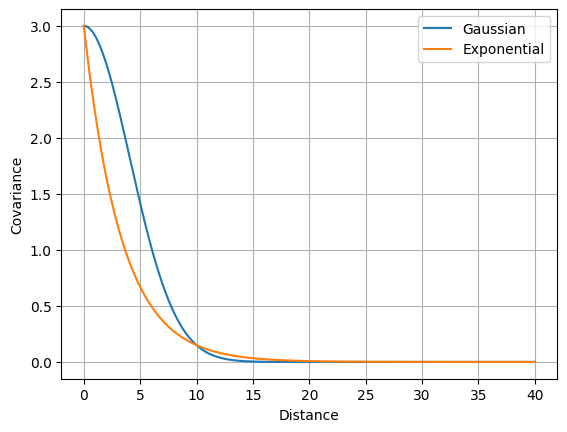

In [3]:
nd=401
d = np.linspace(0,40,nd)

r = 10
v = 3
plt.figure()
plt.plot(d,cov_gau(d,r,v),label='Gaussian')
plt.plot(d,cov_exp(d,r,v),label='Exponential')
#plt.plot(d,cov_nug(d,r,v),label='Nugget')
plt.xlabel('Distance')
plt.ylabel('Covariance')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Covariance matrix @ id=200')

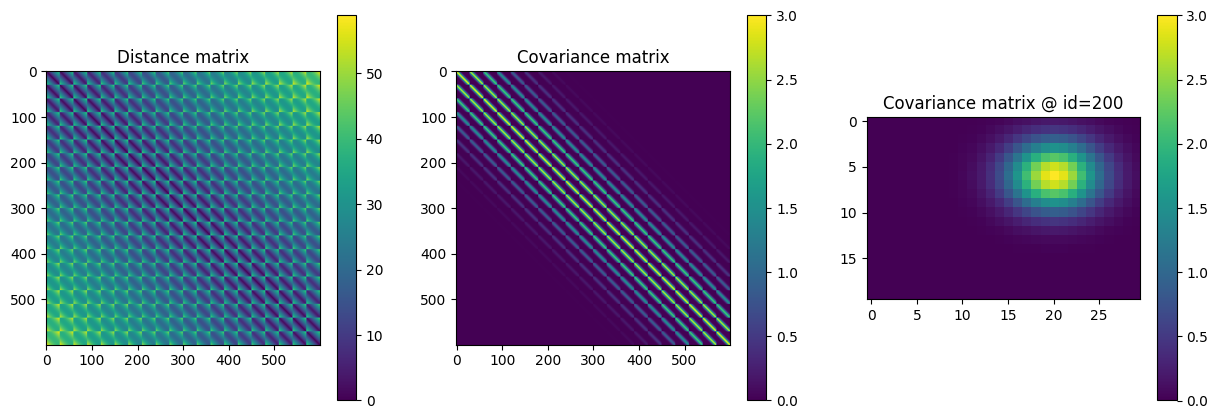

In [4]:


x = np.linspace(1,45,30)
y = np.linspace(1,40,20)
nx=len(x)
ny=len(y)

xx, yy = np.meshgrid(x,y)
xx=xx.flatten()
yy=yy.flatten()

nd=xx.shape[0]

d = np.zeros((nd,nd))
for ix in range(nd):
    for iy in range(nd):
        d[ix,iy] = np.sqrt((xx[ix]-xx[iy])**2 + (yy[ix]-yy[iy])**2)


C = cov_exp(d,range=13,d_var=3)
d_nug = 0.001
C = cov_gau(d,range=13,d_var=3-d_nug)+cov_nug(d,d_nug)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(d)
plt.colorbar()
plt.title('Distance matrix')
plt.subplot(1,3,2)
plt.imshow(C)
plt.colorbar()
plt.title('Covariance matrix')
plt.subplot(1,3,3)
id=200
plt.imshow(C[id].reshape((ny,nx)))
plt.colorbar()
plt.title('Covariance matrix @ id=%d' %(id))

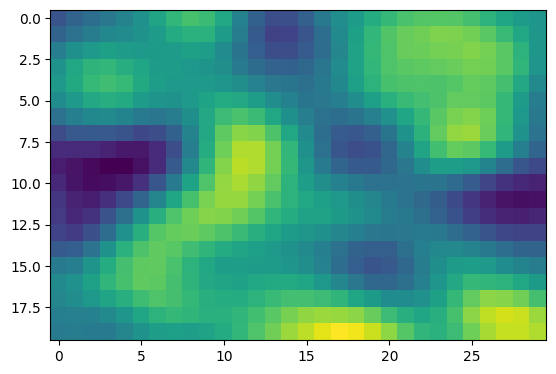

In [5]:

def cholesky_sim(d0, Cd):
    L=np.linalg.cholesky(Cd)
    r = np.random.normal(0,1,d0.shape[0])
    d_star = d0 + np.dot(L,r)
    return d_star


m0 = np.zeros(nd)
m = cholesky_sim(m0,C)
m_2d = m.reshape((ny,nx))

plt.imshow(m_2d)



1
(600,)
(600, 600)
(600,)
1
(600,)
(600, 600)
(600,)


Text(0.5, 1.0, 'Difference')

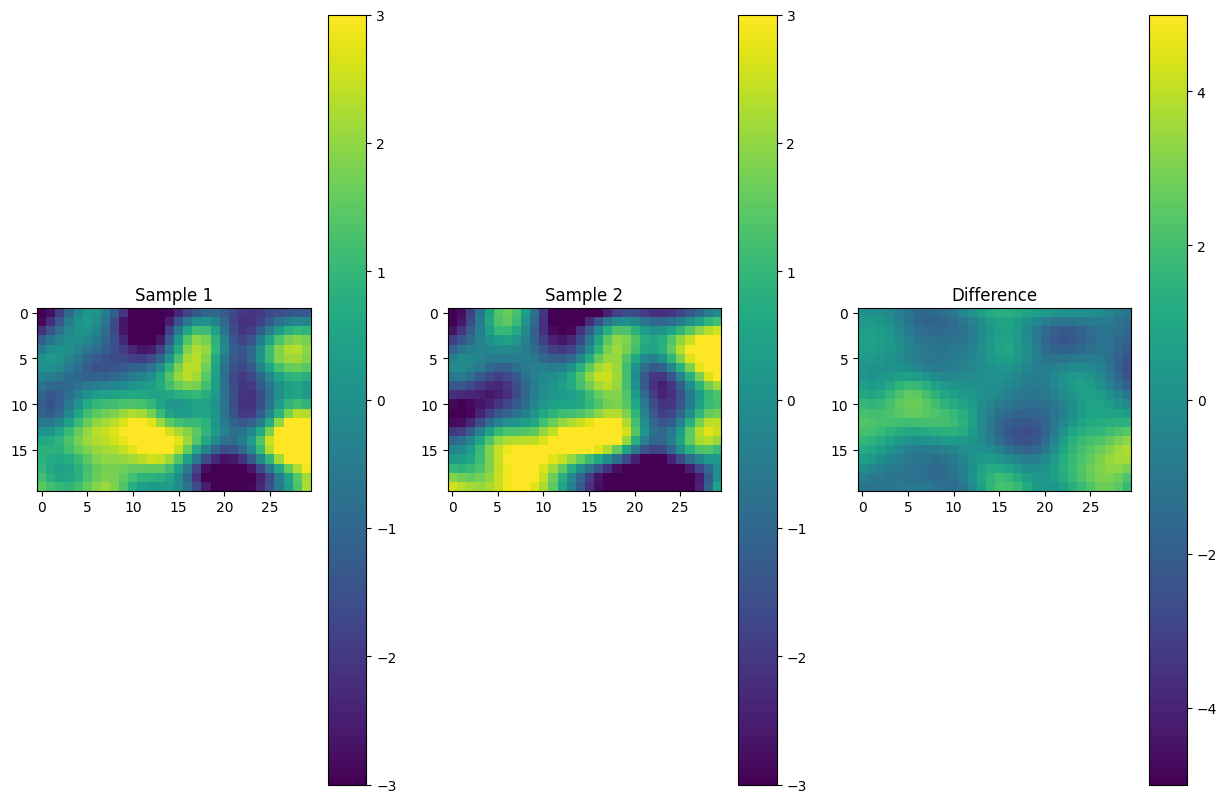

In [6]:
def cholesky_sim(d0, Cd, r_in=[], is_chol=False):
    if is_chol:
        L = Cd
    else:
        L=np.linalg.cholesky(Cd)

    if len(r_in)==0:
        r = np.random.normal(0,1,d0.shape[0])
    else:
        r = r_in
    
    print(1)
    print(d0.shape)
    print(L.shape)
    print(r.shape)
    d_star = d0 + np.dot(L,r)
    return d_star, r

L=np.linalg.cholesky(C)

m0 = np.zeros(nd)
m, r= cholesky_sim(m0,L,is_chol=True)
m_2d = m.reshape((ny,nx))

r_in = r.copy()
for i in range(200):
    i_pert = np.random.randint(0,nd)
    #i_pert = i
    r_in[i_pert] = np.random.normal(0,1)
m2, r2 = cholesky_sim(m0,L,is_chol=True, r_in = r_in)
m2_2d = m2.reshape((ny,nx))

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(m_2d, vmin=-3, vmax=3)
plt.colorbar()
plt.title('Sample 1')
plt.subplot(1,3,2)
plt.imshow(m2_2d, vmin=-3, vmax=3)
plt.colorbar()
plt.title('Sample 2')
plt.subplot(1,3,3)
plt.imshow(m_2d-m2_2d, vmin=-5, vmax=5)
plt.colorbar()
plt.title('Difference')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


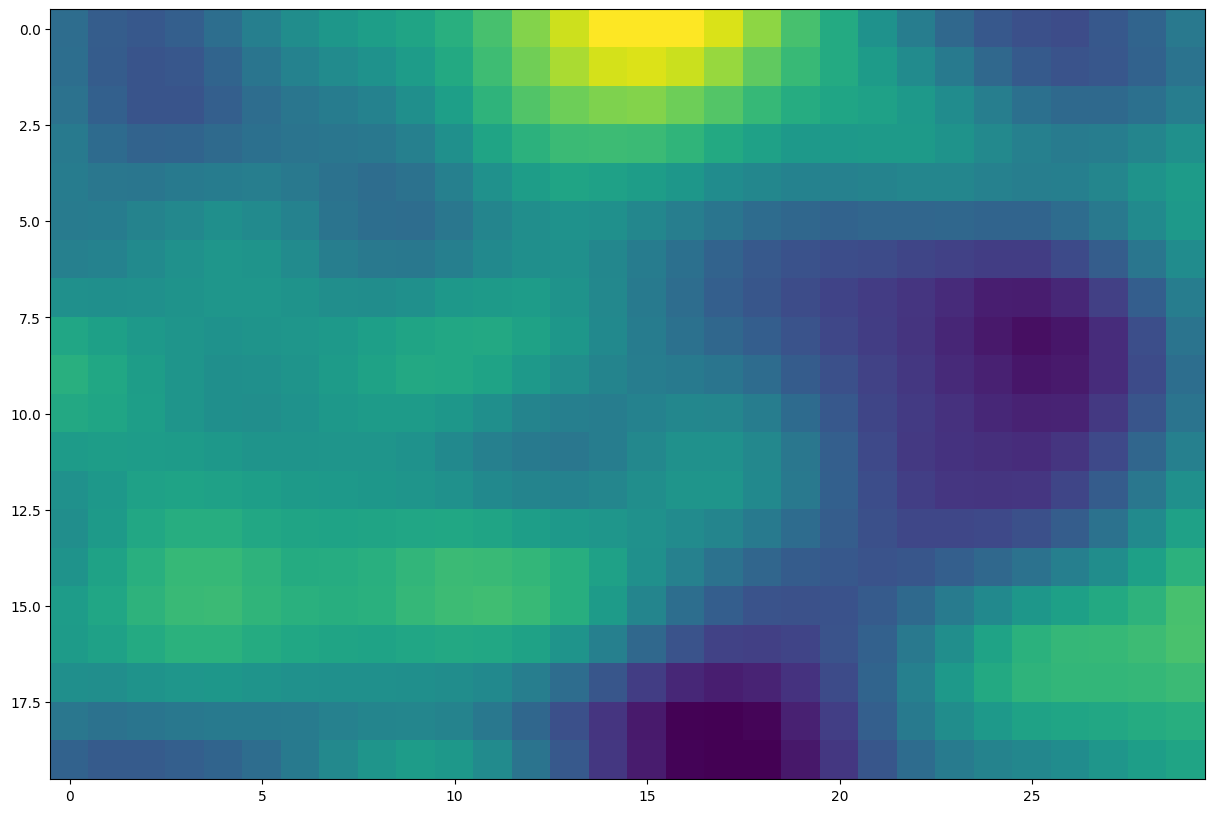

In [7]:
def gaussian_rw(d0, Cd, r_in=[], is_chol=False, step = 0.1, method='gdm'):
    if is_chol:
        L = Cd
    else:
        L=np.linalg.cholesky(Cd)

    if len(r_in)==0:
        r = np.random.normal(0,1,d0.shape[0])
    else:
        if step>0:
            if method=='gdm':
                step_ang = step*np.pi/2
                r_new = np.random.normal(0,1,d0.shape[0])
                r = r_in*np.cos(step_ang) + r_new*np.sin(step_ang)
            else:
                n = Cd.shape[0]
                n_pert = int(np.ceil(step*n))
                r = r_in
                # select randomly n_pert of out n integer values
                i_pert = np.random.choice(n, n_pert, replace=False)
                r[i_pert]=np.random.normal(0,1,i_pert.shape)
        else:
            r = r_in

    d_star = d0 + np.dot(L,r)
    return d_star, r


L=np.linalg.cholesky(C)

m0 = np.zeros(nd)
m, r = gaussian_rw(m0, L, is_chol=True)
step = 0.1
import matplotlib.animation as animation

fig = plt.figure(figsize=(15, 10))
ims = []
method = 'gdm'

for i in range(50):
    print(i)
    m, r = gaussian_rw(m0, L, r_in=r, step=step, is_chol=True, method=method )
    #m, r = gaussian_rw(m0, L, is_chol=True )
    im = plt.imshow(np.reshape(m, (ny, nx)), vmin=-5, vmax=5, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
ani.save('RandomWalk_%s.mp4'%(method), writer='ffmpeg')
#plt.show()